### How to evaluate a model
When our project goes into development stage, it needs to be estimated on several test sets. Furthermore, we also need to determine which measurement metrics for the task. In other words, our first objective is to see how well model cna be **generalized** and second objective is which **measurement metric** will be use. 
In fact, we often want to compare several models to select the best predictive model. As a result, a final step, **an ad-hoc analysis** will be presented in this notebook to illustrate **how** a comparative decision wil be made with statistic test.

1. **Train /test/evaluation** method
Split the dataset into two subsets where one subset is used for training, and tuning with test set. finallly evaluating on the last set. We use [Pima Indian diabete dataset]("https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes") from UCI.

In [2]:
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age','label']
pima = pd.read_csv(url, header=None, names=col_names)

In [4]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


label

    1: diabetes
    0: no diabetes

pregnant

    number of times pregnan

In [6]:
# X is a matrix, hence we use [] to access the features we want in feature_cols
X = pima[['pregnant', 'insulin', 'bmi', 'age']]
y = pima.label
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Logistic Regression model

In [8]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
y_pred_class = logreg.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
print(accuracy_score(y_test, y_pred_class))

0.692708333333


In [22]:
## Check target class
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [23]:
# Percentage of label one 
y_test.mean()

0.3229166666666667

In [24]:
# Computing accuracy of a based model
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

In [25]:
# As a target class unbalanced, we illustrate confusion matrix
confusion =confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[118  12]
 [ 47  15]]


In [26]:
##  check the accuracy

assert ((TP + TN) / float(TP + TN + FP + FN)) == accuracy_score(y_test, y_pred_class)

In [28]:
sensitivity = TP / float(FN + TP)
specificity = TN / (TN + FP)
assert metrics.recall_score(y_test, y_pred_class) ==sensitivity

In [31]:
precision = TP / float(TP + FP)

assert precision == precision_score(y_test, y_pred_class)

### Summarize
Which metrics should you focus on?

    Choice of metric depends on your business objective
        Identify if FP or FN is more important to reduce
        Choose metric with relevant variable (FP or FN in the equation)
    Spam filter (positive class is "spam"):
        Optimize for precision or specificity
            precision
                false positive as variable
            specificity
                false positive as variable
        Because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
    Fraudulent transaction detector (positive class is "fraud"):
        Optimize for sensitivity
            FN as a variable
        Because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)


## Adjusting the classification threshold

In [34]:
logreg.predict(X_test)[0:10]
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10]

array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

In [35]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

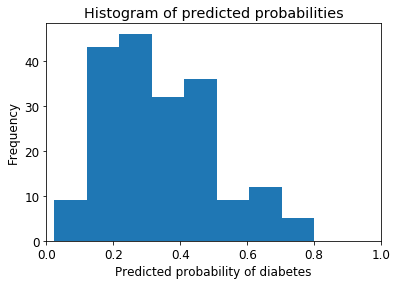

In [37]:
# histogram of predicted probabilities
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12
# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

    We can see from the third bar
        About 45% of observations have probability from 0.2 to 0.3
        Small number of observations with probability > 0.5
        This is below the threshold of 0.5
        Most would be predicted "no diabetes" in this case
    Solution
        Decrease the threshold for predicting diabetes
            Increase the sensitivity of the classifier
                This would increase the number of TP
                    More sensitive to positive instances
                    Example of metal detector
                        Threshold set to set off alarm for large object but not tiny objects
                        YES: metal, NO: no metal
                        We lower the threshold amount of metal to set it off
                        It is now more sensitive to metal
                        It will then predict YES more often



In [38]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
# it will return 1 for all values above 0.3 and 0 otherwise
# results are 2D so we slice out the first column
y_pred_class = binarize(y_pred_prob, 0.3)[0]



ValueError: Expected 2D array, got 1D array instead:
array=[ 0.36752429  0.28356344  0.28895886  0.4141062   0.15896027  0.17065156
  0.49889026  0.51341541  0.27678612  0.67189438  0.35755557  0.74087965
  0.36050235  0.23012363  0.42654231  0.19103515  0.45763601  0.1190141
  0.43928953  0.36961151  0.44187989  0.37611662  0.19816022  0.41677304
  0.15548281  0.2531671   0.09743077  0.69633712  0.15358309  0.2197836
  0.43094832  0.34216058  0.22396114  0.38073543  0.13342134  0.38790216
  0.47049703  0.16204743  0.29548176  0.30918161  0.27299705  0.38816583
  0.27353443  0.28881041  0.63471914  0.02365251  0.15820648  0.23018375
  0.3484593   0.27580041  0.33264104  0.24880596  0.74489512  0.39001464
  0.41625545  0.13575687  0.18895376  0.64777682  0.18922131  0.05685904
  0.63991547  0.46636382  0.1250972   0.26957602  0.24919104  0.30570396
  0.46376224  0.20963095  0.42847829  0.40762264  0.20169096  0.27027066
  0.26255856  0.57238263  0.45467041  0.27716152  0.58001281  0.41599488
  0.27276101  0.34099223  0.54626578  0.37930723  0.2992205   0.10059169
  0.32872602  0.45101363  0.16036979  0.4896975   0.63230508  0.40738404
  0.19794397  0.19698021  0.24463208  0.11147185  0.4158597   0.21561856
  0.54124529  0.48803602  0.64652767  0.33940658  0.54263427  0.16213824
  0.3778741   0.11311287  0.34781987  0.34042784  0.1790985   0.21324812
  0.14710946  0.23014102  0.18404592  0.52224649  0.47099366  0.28884248
  0.49325079  0.41744473  0.22915008  0.27022911  0.19243924  0.7498713
  0.46500093  0.6645454   0.42098599  0.53564034  0.16034702  0.1435686
  0.38142426  0.33827314  0.3630065   0.12842531  0.28333693  0.04005558
  0.18481139  0.66716947  0.46352874  0.48715682  0.19910794  0.45861651
  0.23216721  0.18369267  0.26391994  0.37492969  0.12916506  0.41413913
  0.42460858  0.13832191  0.20781694  0.29477699  0.15825099  0.36016234
  0.23741449  0.43350689  0.20619881  0.23162338  0.61111541  0.19731009
  0.80071498  0.17808491  0.36488735  0.78618643  0.44080614  0.36559654
  0.11760138  0.22843325  0.47865069  0.21320525  0.51498521  0.16122494
  0.23740119  0.29374391  0.16670048  0.48716526  0.29969894  0.44651043
  0.50169902  0.29246506  0.61736228  0.41593995  0.25820945  0.1741968
  0.33519541  0.69606825  0.32454368  0.35730426  0.2336947   0.23738524
  0.38409318  0.24691412  0.27954552  0.18501174  0.2622362   0.27856926].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
http://www.ritchieng.com/machine-learning-evaluate-classification-model/

## how often is the classifier incorrect?

In [20]:
error = (FP + FN) / float(TP + TN + FP + FN)

assert error == 1 - metrics.accuracy_score(y_test, y_pred_class)

AssertionError: 

In [ ]:
K-fold cross-validation

    Systematically create "K" train/test splits and average the results together
    Even better estimate of out-of-sample performanc

### Review
In the context of binary classification, examples are either positive or negative.   
**TP** (True Positive) =  Test says “A” while True is "A"; **FN** (False Negative)=  Test says "Not A" while it is "A".
**FP** (Falso positive)=  Test says "A" while it is not "A"; **TN** (True negative)=  Test says "not A" while it is not "A"


 > The recall addresses the question: "Given a positive example, will the classifier detect it ?"    
 > The precision addresses the question: "Given a positive prediction from the classifier, how likely is it to be correct ?"
 
Recall = TP/(TP + FN) whereas precision = TP/(TP+FP).   
Eg.1: Assuming we create a detect videos that is safe for kid, our model may decide to keep only a good one (low recall) or higher TP by keeping only a safe one (high precision) **Rather than** higher recall but leta a few bad videos go through.
E.g 2: A prodictive model to detect shopliters on surveillance video: we want all shoplifter caught by raising higer recall and allow lower precision. Since precision increases, recall decreases, this is known as precision-recall trade-off

In [ ]:
## When threshold comes into a pictures
Threshold can be used to changed precision/ recall. To explain, we consider an example from Handon- ML and Tensor page 69

